<a href="https://colab.research.google.com/github/nok4123456/TensorFlow_Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install colab_ssh --upgrade
from colab_ssh import launch_ssh_cloudflared
ssh_tunnel_password = "q45623" #@param {type: "string"}
launch_ssh_cloudflared(password=ssh_tunnel_password)

# Introduction to Convolutional Neural Networks and Computer Vision

In [ ]:
!pwd

/content


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2023-09-04 06:23:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 74.125.70.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   224MB/s    in 0.5s    

2023-09-04 06:23:22 (224 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become on with it)

Visuallizing the data

In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} file in {dirpath}")

There are 2 directories and 0 file in pizza_steak
There are 2 directories and 0 file in pizza_steak/test
There are 0 directories and 250 file in pizza_steak/test/steak
There are 0 directories and 250 file in pizza_steak/test/pizza
There are 2 directories and 0 file in pizza_steak/train
There are 0 directories and 750 file in pizza_steak/train/steak
There are 0 directories and 750 file in pizza_steak/train/pizza


In [ ]:
num_steak_image_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_image_test = len(os.listdir('pizza_steak/test/steak'))

num_steak_image_train , num_steak_image_test

(750, 250)

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
# Created a list of class_names from the subdirectory
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

Image shape for this pizza is (512, 512, 3)


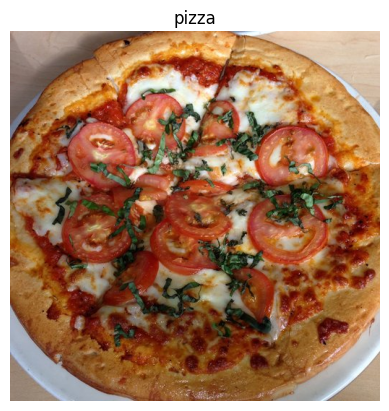

In [ ]:
# Visualize the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir , target_class):
  data_dir = pathlib.Path(target_dir,target_class)
  file_name = list(data_dir.iterdir())
  random_index = random.randint(0,len(file_name))
  image = file_name[random_index]
  image = mpimg.imread(image)
  plt.imshow(image)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape for this {target_class} is {image.shape}')
  return image

image = view_random_image('pizza_steak/train','pizza')



In [ ]:
import tensorflow as tf

image = tf.constant(image)
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[179, 152, 141],
        [181, 154, 143],
        [179, 152, 141],
        ...,
        [231, 206, 184],
        [231, 206, 184],
        [231, 206, 184]],

       [[175, 148, 137],
        [178, 151, 140],
        [177, 150, 139],
        ...,
        [230, 205, 183],
        [230, 205, 183],
        [231, 206, 184]],

       [[166, 139, 128],
        [171, 144, 133],
        [172, 148, 136],
        ...,
        [228, 203, 181],
        [228, 203, 181],
        [229, 204, 182]],

       ...,

       [[148, 129, 114],
        [148, 129, 114],
        [148, 129, 114],
        ...,
        [172, 152, 127],
        [175, 155, 131],
        [177, 157, 133]],

       [[146, 127, 112],
        [148, 129, 114],
        [149, 130, 115],
        ...,
        [175, 155, 130],
        [177, 157, 133],
        [179, 159, 135]],

       [[140, 121, 106],
        [142, 123, 108],
        [145, 126, 111],
        ...,
        [176, 156, 13

In [ ]:
image.shape

TensorShape([512, 512, 3])

In [ ]:
image/255

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.7019608 , 0.59607846, 0.5529412 ],
        [0.70980394, 0.6039216 , 0.56078434],
        [0.7019608 , 0.59607846, 0.5529412 ],
        ...,
        [0.90588236, 0.80784315, 0.72156864],
        [0.90588236, 0.80784315, 0.72156864],
        [0.90588236, 0.80784315, 0.72156864]],

       [[0.6862745 , 0.5803922 , 0.5372549 ],
        [0.69803923, 0.5921569 , 0.54901963],
        [0.69411767, 0.5882353 , 0.54509807],
        ...,
        [0.9019608 , 0.8039216 , 0.7176471 ],
        [0.9019608 , 0.8039216 , 0.7176471 ],
        [0.90588236, 0.80784315, 0.72156864]],

       [[0.6509804 , 0.54509807, 0.5019608 ],
        [0.67058825, 0.5647059 , 0.52156866],
        [0.6745098 , 0.5803922 , 0.53333336],
        ...,
        [0.89411765, 0.79607844, 0.70980394],
        [0.89411765, 0.79607844, 0.70980394],
        [0.8980392 , 0.8       , 0.7137255 ]],

       ...,

       [[0.5803922 , 0.5058824 , 0.44705883],
        [0.58

## An end-to-end example for CNN

1. Load the images
2. Preprocess the images
3. Build a CNN to find patterns in our ima ges
4. Complile the CNN
5. Fit the CNN to the training data

In [ ]:
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess the data
train_data_generator = ImageDataGenerator(rescale= 1./255)
valid_data_generator = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directories

base_path = Path('pizza_steak')

# Import Data
train_data = train_data_generator.flow_from_directory(directory = base_path / 'train' , batch_size = 32 ,
                                                      target_size = (224,224), class_mode = 'binary' , seed = 42)

valid_data = valid_data_generator.flow_from_directory(directory = base_path / 'test' , batch_size = 32 ,
                                                      target_size = (224,224), class_mode = 'binary' , seed = 42)

# Build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu',
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])

# Fit the data

history_1 = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data , validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 143ms/step - loss: 0.6124 - accuracy: 0.6520 - val_loss: 0.3992 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.4399 - accuracy: 0.8053 - val_loss: 0.3636 - val_accuracy: 0.8720
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4175 - accuracy: 0.8207 - val_loss: 0.3588 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.3824 - accuracy: 0.8380 - val_loss: 0.3514 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3528 - accuracy: 0.8560 - val_loss: 0.3460 - val_accuracy: 0.8320


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

# Break down of Binary Classification

1. Become one with the data (visualize)
2. Preprocess the data (perpared it for the model, the main steo here was scaling/ normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model.
7. Repeat unitl satisfied(experiment)

## 1. Become one with the data

Image shape for this pizza is (384, 512, 3)
Image shape for this steak is (512, 512, 3)


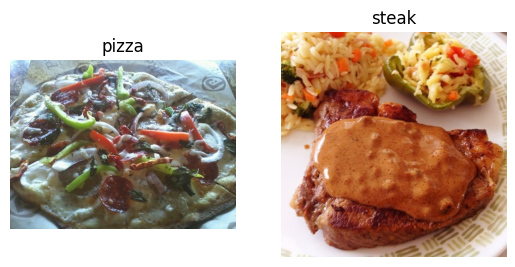

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train','pizza')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train','steak')

## 2. Preprocess the data (prepare it for a model)

In [ ]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

A batch is a small subset of data. A model might only look at 32 at a time.

- Ton of images might not fit into the memory of the processor(GPU)

- Trying to learn the pattrern in 10,000 images in one hit could result in the model not being able to learn very well



In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directoy of images
                                               target_size=(224,224), # Taraget size of images (height,width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches
test_data = test_datagen.flow_from_directory(directory= test_dir,target_size=(224,224),class_mode='binary',batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images , labels = train_data.next()
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
len(train_data)

47

## 3. Create a CNN model

A baseline is a relatively simple model or existing result that you setup when beginning a machine experimenting, you try to beat the baseline.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense , Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model
model_CNN_demo = Sequential([
    Conv2D(
        filters=10, # filter is the number of sliding window going across an input (high = more complex model)
        kernel_size=3, # the size of the sliding window going across an input
        strides=1, # the size of the step the sliding window takes across an input
        padding='valid', # if 'same' , output shape is same as input shape, if 'valid' , output shape gets compressed
        activation='relu',
        input_shape=(224,224,3) # input layer (specify input shape)
    ),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
model_CNN_demo.compile(loss = 'binary_crossentropy', optimizer = Adam() , metrics = ['accuracy'])

In [ ]:
model_CNN_demo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the length of training and test data generators
len(train_data) , len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_CNN_demo = model_CNN_demo.fit(train_data , epochs = 5 ,steps_per_epoch= len(train_data) , validation_data = test_data , validation_steps = len(test_data),shuffle = True)

Epoch 1/5
47/47 [==============================] - 10s 165ms/step - loss: 0.8315 - accuracy: 0.6753 - val_loss: 0.4185 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4235 - accuracy: 0.8113 - val_loss: 0.3617 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3133 - accuracy: 0.8713 - val_loss: 0.3563 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.1734 - accuracy: 0.9420 - val_loss: 0.5859 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.0680 - accuracy: 0.9813 - val_loss: 0.4287 - val_accuracy: 0.8100


## 5. Evaluating our model

<Axes: >

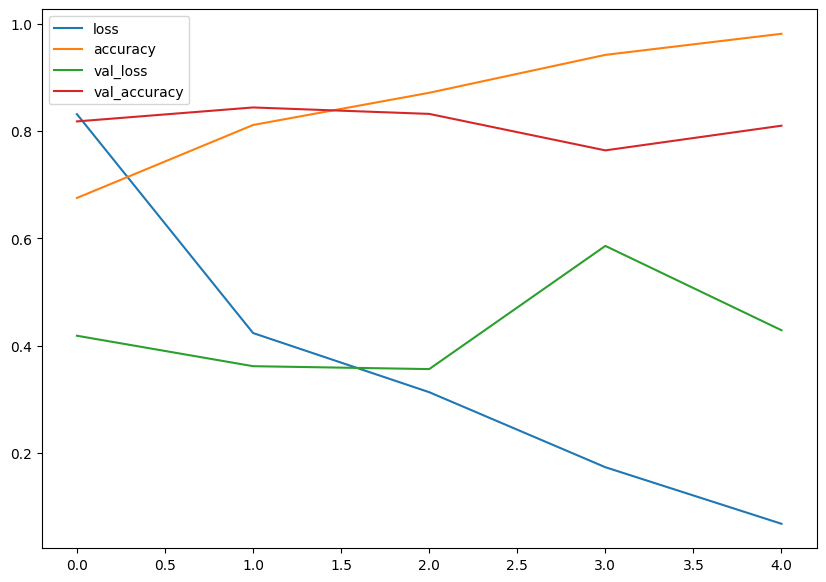

In [ ]:
# Plot the training curves
import pandas as pd

pd.DataFrame(history_CNN_demo.history).plot(figsize=(10,7))

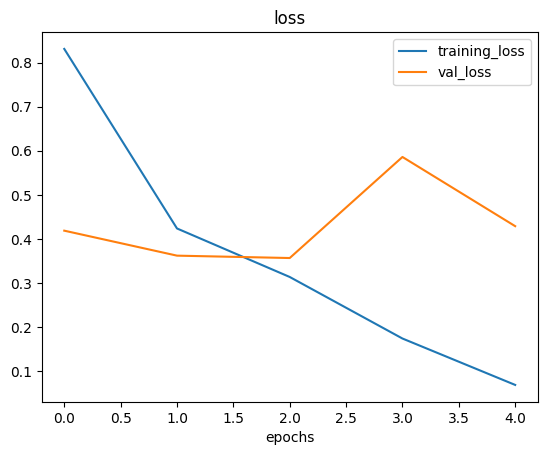

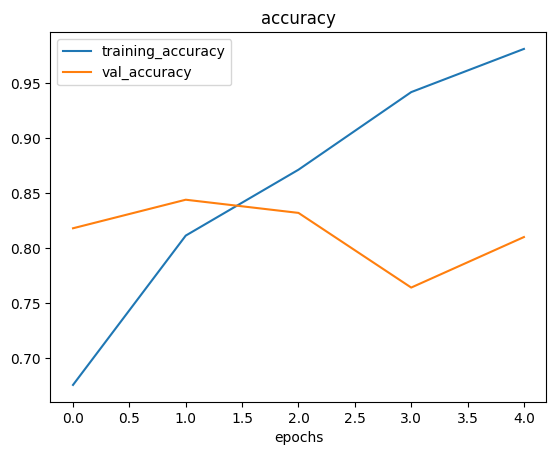

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curve(history):
  '''
  Returns separate loss curve for training and validation metrics
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs,loss,label = 'training_loss')
  plt.plot(epochs,val_loss , label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label = 'training_accuracy')
  plt.plot(epochs,val_accuracy , label = 'val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()
  return


plot_loss_curve(history_CNN_demo)

## 6. Adjusting the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Way of induces overfitting:

- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer

Way of reduce overfitting:

- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data

In [ ]:
# Create the model (this is going to be our new baseline)

model_CNN_demo_2 = Sequential([
    Conv2D(10,3,activation = 'relu' , input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_CNN_demo_2.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history_2 = model_CNN_demo_2.fit(train_data , epochs = 5 ,steps_per_epoch= len(train_data) , validation_data = test_data , validation_steps = len(test_data),shuffle = True)


Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6152 - accuracy: 0.6540 - val_loss: 0.4996 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4808 - accuracy: 0.7820 - val_loss: 0.3906 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4372 - accuracy: 0.8053 - val_loss: 0.3595 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 0.4013 - accuracy: 0.8220 - val_loss: 0.3341 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3665 - accuracy: 0.8473 - val_loss: 0.3188 - val_accuracy: 0.8640


In [ ]:
model_CNN_demo_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

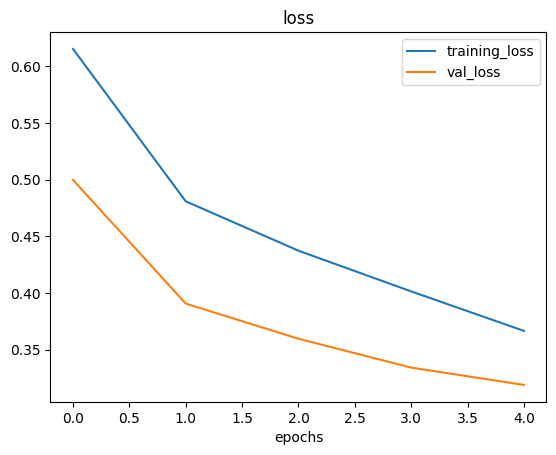

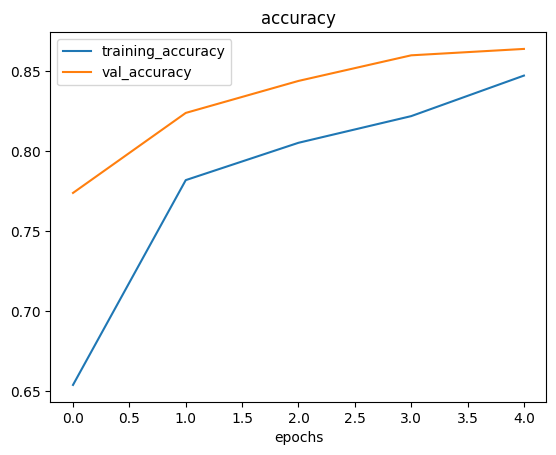

In [ ]:
plot_loss_curve(history_2)

## Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=0.2,shear_range=0.2,width_shift_range=0.2,height_shift_range=0.3,horizontal_flip=True)

# Create imageDataGenerator without data augmentataion

train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator for test dataset

test_datagen= ImageDataGenerator(rescale=1/255.)

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir, # Target directoy of images
                                               target_size=(224,224), # Taraget size of images (height,width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32, # size of minibatches
                                               shuffle = False)

train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directoy of images
                                               target_size=(224,224), # Taraget size of images (height,width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32, # size of minibatches
                                               shuffle = False)

test_data = test_datagen.flow_from_directory(directory= test_dir,target_size=(224,224),class_mode='binary',batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


- Visualize some augmented data

In [ ]:
# Get some sample data

images , labels = train_data.next()
augmented_images , augmented_labels = train_data_augmented.next()

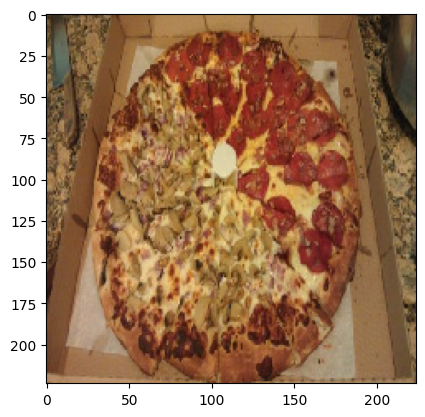

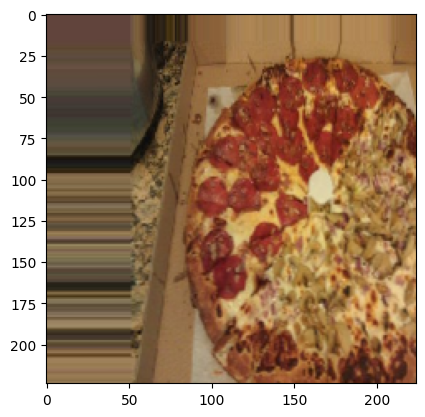

In [ ]:
# Show image
import random

random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.figure()
plt.imshow(augmented_images[random_number])

In [ ]:
history_3 = model_CNN_demo_2.fit(train_data_augmented , epochs = 5 ,steps_per_epoch= len(train_data_augmented) , validation_data = test_data , validation_steps = len(test_data),shuffle = True)

Epoch 1/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6629 - accuracy: 0.6693 - val_loss: 0.4092 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 24s 490ms/step - loss: 0.5620 - accuracy: 0.7093 - val_loss: 0.3862 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 20s 427ms/step - loss: 0.5094 - accuracy: 0.7533 - val_loss: 0.3708 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.5003 - accuracy: 0.7633 - val_loss: 0.3612 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 20s 411ms/step - loss: 0.4778 - accuracy: 0.7733 - val_loss: 0.5142 - val_accuracy: 0.7380


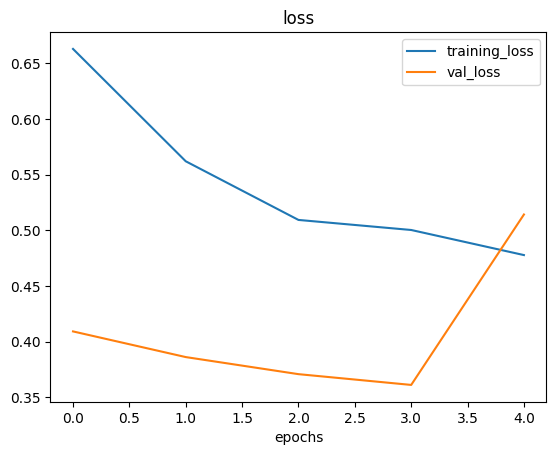

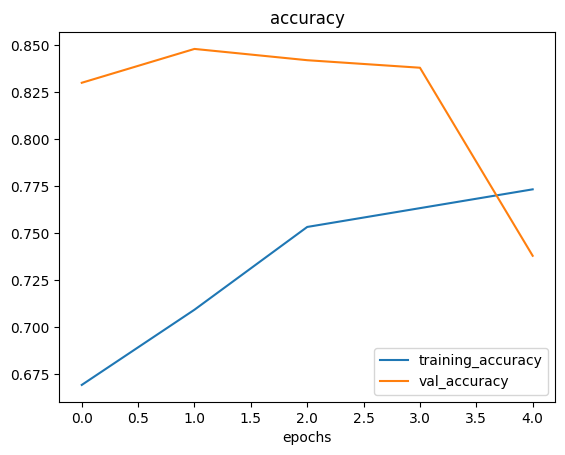

In [ ]:
# Check the modles training curves
plot_loss_curve(history_3)

- Let's shuffle our training data and train them.

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir, # Target directoy of images
                                               target_size=(224,224), # Taraget size of images (height,width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32, # size of minibatches
                                               shuffle = True)

train_data_shuffled = train_datagen.flow_from_directory(directory = train_dir, # Target directoy of images
                                               target_size=(224,224), # Taraget size of images (height,width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32, # size of minibatches
                                               shuffle = True)

test_data = test_datagen.flow_from_directory(directory= test_dir,target_size=(224,224),class_mode='binary',batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
history_4 = model_CNN_demo_2.fit(train_data_augmented_shuffled , epochs = 5 ,steps_per_epoch= len(train_data_augmented_shuffled) , validation_data = test_data , validation_steps = len(test_data),shuffle = True)

Epoch 1/5
47/47 [==============================] - 20s 425ms/step - loss: 0.5108 - accuracy: 0.7753 - val_loss: 0.3367 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 19s 409ms/step - loss: 0.4610 - accuracy: 0.7833 - val_loss: 0.3150 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 20s 424ms/step - loss: 0.4491 - accuracy: 0.7967 - val_loss: 0.3085 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.4512 - accuracy: 0.7933 - val_loss: 0.3109 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 19s 404ms/step - loss: 0.4375 - accuracy: 0.7953 - val_loss: 0.3187 - val_accuracy: 0.8660


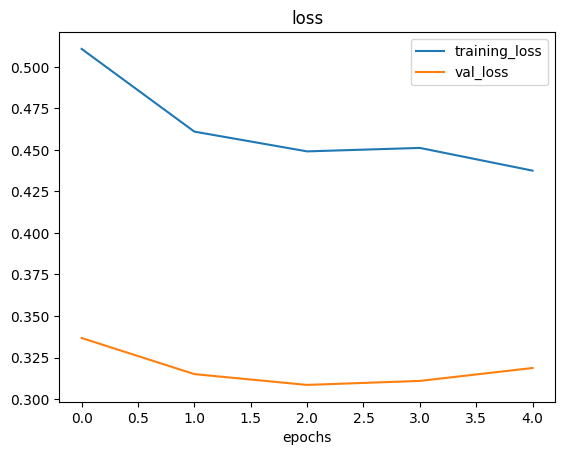

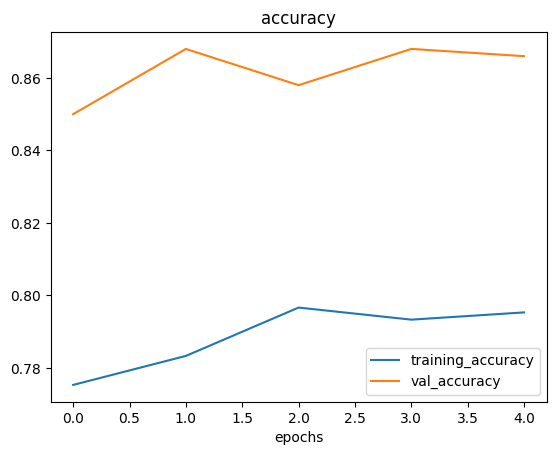

In [ ]:
# Check the modles training curves
plot_loss_curve(history_4)

## 7. Repeat until satisfied

There are a few thing can try to contine to improve the model :

- Increase the number of model layer

- Increase the number of filters in each convolutional layer

- Train for longer (more epochs)

- Find an ideal learning rate

- Get more data

- Use **transfer learning**

In [ ]:
model_CNN_demo_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu',
        input_shape=(224,224,3)
    ),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding='same'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model_CNN_demo_3.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
history_5 = model_CNN_demo_3.fit(train_data_augmented_shuffled , epochs = 10 ,steps_per_epoch= len(train_data_augmented_shuffled) , validation_data = test_data , validation_steps = len(test_data),shuffle = True)

Epoch 1/10
47/47 [==============================] - 23s 416ms/step - loss: 0.6761 - accuracy: 0.5653 - val_loss: 0.5812 - val_accuracy: 0.7080
Epoch 2/10
47/47 [==============================] - 21s 439ms/step - loss: 0.5595 - accuracy: 0.7180 - val_loss: 0.4332 - val_accuracy: 0.8120
Epoch 3/10
47/47 [==============================] - 20s 415ms/step - loss: 0.5088 - accuracy: 0.7593 - val_loss: 0.3520 - val_accuracy: 0.8560
Epoch 4/10
47/47 [==============================] - 20s 435ms/step - loss: 0.4804 - accuracy: 0.7847 - val_loss: 0.3564 - val_accuracy: 0.8520
Epoch 5/10
47/47 [==============================] - 20s 427ms/step - loss: 0.4589 - accuracy: 0.8060 - val_loss: 0.3541 - val_accuracy: 0.8540
Epoch 6/10
47/47 [==============================] - 19s 414ms/step - loss: 0.4421 - accuracy: 0.8067 - val_loss: 0.3226 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 20s 434ms/step - loss: 0.4624 - accuracy: 0.7940 - val_loss: 0.3668 - val_accuracy: 0.8380

# Making a prediction with the trained model on custom data

In [ ]:
print(class_names)

['pizza' 'steak']


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-09-04 06:35:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-09-04 06:35:34 (32.9 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

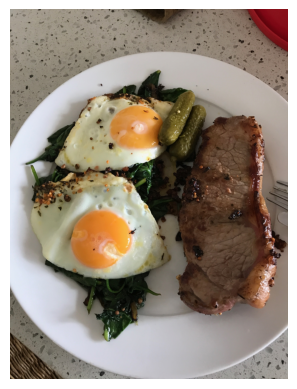

In [ ]:
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

- Preprocessed the data

In [ ]:
# Create a function to import and image and resize it to be able to fit in the model
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename , turns ut into a tensor and reshapes
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape,img_shape])
  # Rescale the image
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_CNN_demo_3.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 20ms/step


array([[0.8640509]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

1/1 [==============================] - 0s 60ms/step


'steak'

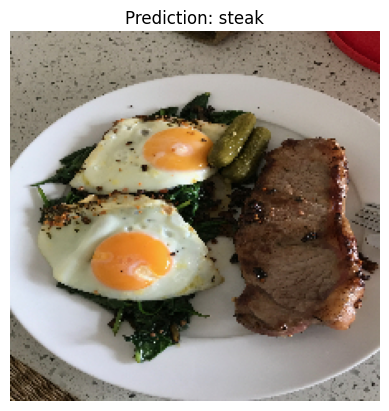

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  imports an image located at filename, makes a prediction with model
  and plots the image with the predicted calss as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

  return pred_class

pred_and_plot(model_CNN_demo_3,'03-steak.jpeg')

--2023-09-04 07:21:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-09-04 07:21:18 (38.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 28ms/step


'pizza'

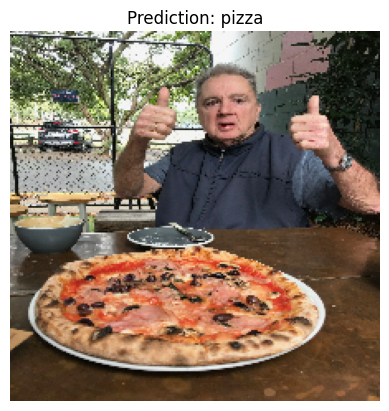

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_CNN_demo_3,'03-pizza-dad.jpeg')